In [38]:
import movieposters as mp
import matplotlib.pyplot as plt
import urllib.request
import io
from PIL import Image

In [ ]:
poster = mp.get_poster(title='fast x')
poster_id = mp.get_poster_id
print(poster)
image_data = urllib.request.urlopen(poster).read()
image = Image.open(io.BytesIO(image_data))

plt.imshow(image)
plt.axis('off')
plt.show()

Another way to get posters

In [67]:
import requests
from bs4 import BeautifulSoup
import urllib.parse
import urllib.request
import io
import matplotlib.pyplot as plt
from PIL import Image

In [71]:
def search_poster(query):
    # Construct the search query URL for Google Images
    query = urllib.parse.quote(query)
    url = f"https://www.google.com/search?q={query}&tbm=isch"

    # Send a GET request to retrieve the HTML content of the search results page
    response = requests.get(url)

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all image elements in the search results
    img_elements = soup.find_all('img')

    # Get the source URL of the first non-Google logo image
    img_url = None
    for img in img_elements:
        src = img.get('src')
        if src and 'googlelogo' not in src:
            img_url = src
            break

    if img_url is None:
        print("No poster found.")
        return

    # Download the image data
    image_data = urllib.request.urlopen(img_url).read()

    # Load the image using PIL
    image = Image.open(io.BytesIO(image_data))

    # Display the image using matplotlib.pyplot
    plt.imshow(image)
    plt.axis('off')
    plt.show()

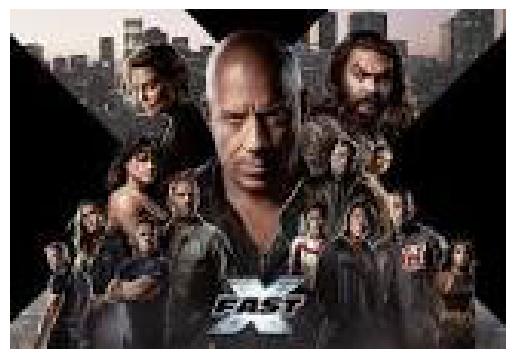

In [73]:
search_poster("Fast X")